In [ ]:
# Raw Package

import numpy as np

import pandas as pd

#Data Source

import yfinance as yf

#Data viz library

import plotly.graph_objs as go

#Download JPYAUD data

data = yf.download(tickers = 'JPYAUD=X' ,period ='1d', interval = '15m')

#declare figure

fig = go.Figure()

#Candlestick

fig.add_trace(go.Candlestick(x=data.index,

open=data['Open'],

high=data['High'],

low=data['Low'],

close=data['Close'], name = 'market data'))

# Add titles

fig.update_layout(

title='Japanese Yen/Australian Dollar')

#Show

fig.show()

[*********************100%***********************]  1 of 1 completed


# Building **Indicators**

In [ ]:
# MA Indicator - Moving Average

[*********************100%***********************]  1 of 1 completed


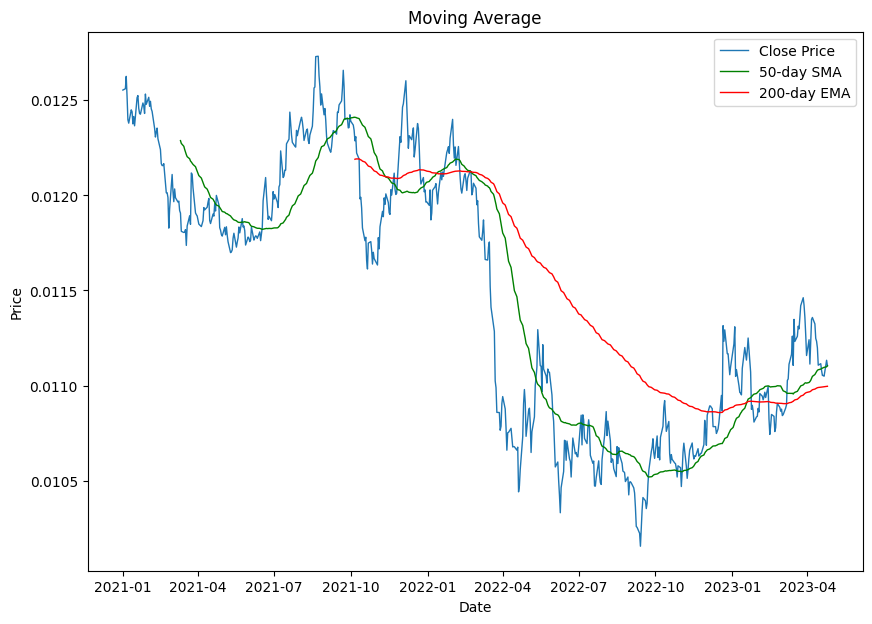

In [ ]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

# Retrieve the Goolge stock data from Yahoo finance
data = yf.download(tickers = 'JPYAUD=X', start="2021-01-01", end="2023-04-26")
close = data['Close']

# Compute the 50-day SMA
n = 50
SMA = SMA(data,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(data,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

# Plotting the Google stock Price Series chart and Moving Averages below
plt.figure(figsize=(10,7))

# Set the title and axis labels
plt.title('Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')

# Plot close price and moving averages
plt.plot(data['Close'],lw=1, label='Close Price')
plt.plot(SMA,'g',lw=1, label='50-day SMA')
plt.plot(EWMA,'r', lw=1, label='200-day EMA')

# Add a legend to the axis
plt.legend()

plt.show()

In [ ]:
# RSI Indicator - Relative Strength Index

[*********************100%***********************]  1 of 1 completed


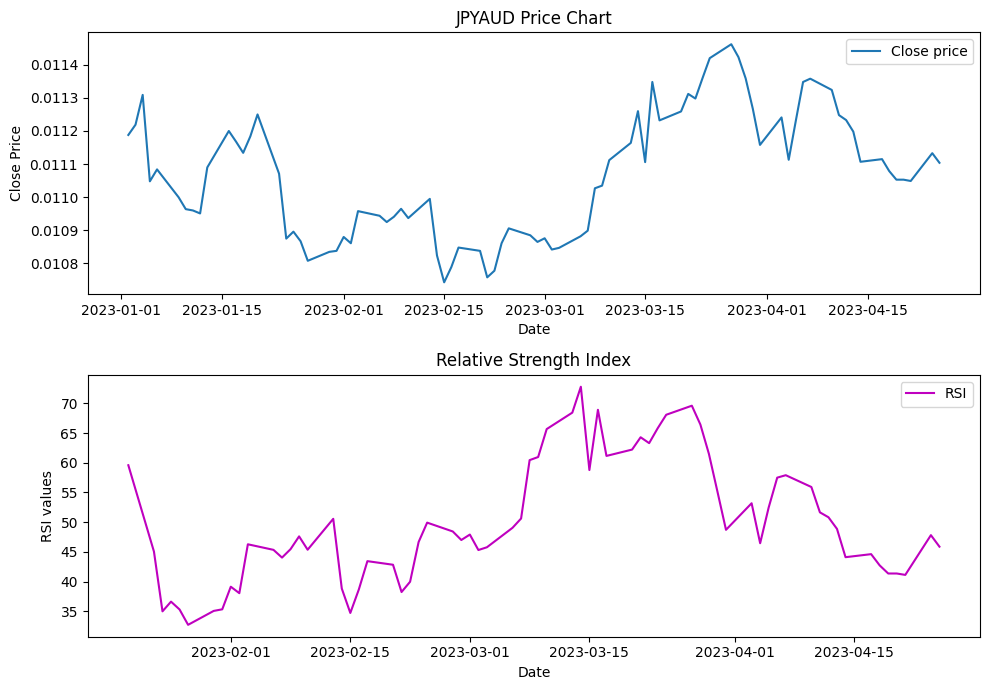

In [ ]:
# Load the necessary packages and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Returns RSI values
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi


# Retrieve the Apple Inc. data from Yahoo finance
data = yf.download(tickers = 'JPYAUD=X', start="2023-01-01", end="2023-04-26")

# Call RSI function from the talib library to calculate RSI
data['RSI'] = rsi(data['Close'])

# Plotting the Price Series chart and the RSI below
fig = plt.figure(figsize=(10, 7))

# Define position of 1st subplot
ax = fig.add_subplot(2, 1, 1)

# Set the title and axis labels
plt.title('JPYAUD Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.plot(data['Close'], label='Close price')

# Add a legend to the axis
plt.legend()

# Define position of 2nd subplot
bx = fig.add_subplot(2, 1, 2)

# Set the title and axis labels
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI values')

plt.plot(data['RSI'], 'm', label='RSI')

# Add a legend to the axis
plt.legend()

plt.tight_layout()
plt.show()